In [1]:
#!pip install scikit-learn
#!pip install tensorflow
#!pip install tensorflow-gpu


In [2]:
import numpy as np

In [3]:
import random
import os
import numpy as np

crossValidationDataPaths=['NORMALIZED/NumericalData/ML/Training/RightHand','NORMALIZED/NumericalData/ML/Training/LeftHand']
testPaths=['NORMALIZED/NumericalData/ML/Test/RightHand','NORMALIZED/NumericalData/ML/Test/LeftHand']



ml_instances_paths=[]
for path in crossValidationDataPaths:
    #print(path)
    classFolders= os.listdir(path)
    for classFolder in classFolders:
        classFolder_path=f'{path}/{classFolder}'
        classTrials =os.listdir(classFolder_path)
        for trial in classTrials:
            trialPath =f'{classFolder_path}/{trial}'
            #print(trialPath)
            ml_instances_paths.append(trialPath)
            


#randomize the list
random.shuffle(ml_instances_paths)
#random.shuffle(ml_instances_paths)
#random.shuffle(ml_instances_paths)


x_shape =[]
y_shape =[]
for ml_instances_path in ml_instances_paths:
    label = ml_instances_path.split('/')
    label = label[len(label)-1].split('_')[0]
    #print(label)
    y_shape.append(int(label))
    npy =np.load(ml_instances_path)
    npy = npy*100
  
    npy_matrix=npy.reshape(-1,1629)
   
    # npy_matrix=extractPoseHand(npy)
    x_shape.append(npy_matrix)    

test_instances_paths=[]
for path in testPaths:
    #print(path)
    testFolders= os.listdir(path)
    for testFolder in testFolders:
        testFolder_path=f'{path}/{testFolder}'
        testTrials =os.listdir(testFolder_path)
        for trial in testTrials:
            trialPath =f'{testFolder_path}/{trial}'
            #print(trialPath)
            test_instances_paths.append(trialPath)


test_x_shape =[]
test_y_shape =[]
for test_instances_path in test_instances_paths:
    label = test_instances_path.split('/')
    label = label[len(label)-1].split('_')[0]
    #print(label)
    test_y_shape.append(int(label))
    npy =np.load(test_instances_path)
    npy=npy*100
    npy_matrix=npy.reshape(-1,1629)

    # npy_matrix=extractPoseHand(npy)
    
    test_x_shape.append(npy_matrix)    


In [4]:
# print(x_shape.shape)
# print(y_shape.shape)

In [5]:
# print(test_x_shape.shape)
# print(test_y_shape.shape)


In [6]:
print('hello')

hello


In [7]:
# training the total data
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Bidirectional, LSTM, Flatten, Dense,Input,  Dropout, BatchNormalization, GRU, Attention,Concatenate, Conv1D, Masking, Embedding
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.optimizers import Adam
import os

epochs = 200
batch_size = 32 # 64
NO_CLASSES = 60 #Changes according to no of class
MAX_FRMAE = 164

learning_rate = 0.00003
input_shape = (MAX_FRMAE,1629)



log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

print(y_shape)
#y_onehot = to_categorical(y_shape).astype(int)
label_encoder=LabelEncoder()
y_encoded =label_encoder.fit_transform(y_shape)
y_onehot =to_categorical(y_encoded,num_classes=NO_CLASSES)
print(len(y_onehot))



all_accuracies = []
x_shapeML = np.array(x_shape) #.astype(int)
x_train=x_shapeML
y_train =y_onehot

test_x_shapeML = np.array(test_x_shape) #.astype(int)
x_val=test_x_shapeML

#y_val = to_categorical(test_y_shape).astype(int)
y_encoded =label_encoder.fit_transform(test_y_shape)
y_val =to_categorical(y_encoded,num_classes=NO_CLASSES)


print('Train shape: ',x_train.shape, y_train.shape,'Test Shape: ', x_val.shape, y_val.shape)

2023-12-30 18:14:33.534312: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-30 18:14:33.554967: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 18:14:33.554986: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 18:14:33.555559: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-30 18:14:33.559054: I tensorflow/core/platform/cpu_feature_guar

[18, 38, 46, 34, 3, 45, 10, 39, 19, 28, 50, 10, 14, 53, 12, 59, 16, 24, 33, 36, 54, 21, 12, 7, 26, 52, 31, 52, 28, 50, 53, 14, 59, 44, 32, 51, 33, 50, 57, 7, 13, 34, 51, 16, 33, 32, 51, 57, 32, 50, 58, 56, 19, 36, 40, 8, 56, 19, 51, 10, 32, 3, 50, 6, 41, 33, 31, 55, 53, 50, 23, 4, 41, 8, 56, 43, 55, 48, 19, 57, 14, 26, 34, 15, 48, 27, 52, 56, 25, 41, 30, 55, 1, 47, 16, 27, 41, 33, 42, 32, 18, 52, 48, 14, 30, 4, 0, 20, 20, 16, 15, 36, 17, 24, 22, 47, 26, 33, 17, 51, 51, 41, 59, 5, 33, 56, 53, 23, 31, 39, 18, 6, 43, 39, 22, 32, 34, 10, 41, 27, 52, 57, 28, 11, 50, 21, 53, 47, 52, 58, 36, 36, 15, 4, 9, 39, 3, 4, 1, 32, 58, 3, 18, 37, 22, 30, 15, 56, 19, 3, 41, 57, 49, 37, 10, 8, 49, 19, 26, 26, 4, 29, 49, 16, 4, 59, 27, 15, 45, 56, 51, 34, 21, 35, 10, 20, 56, 49, 33, 59, 6, 19, 30, 50, 39, 56, 57, 36, 27, 55, 55, 34, 19, 4, 29, 15, 49, 15, 30, 56, 8, 42, 52, 10, 41, 7, 45, 5, 13, 7, 10, 48, 58, 30, 13, 1, 56, 52, 13, 13, 23, 51, 21, 16, 35, 51, 49, 16, 26, 12, 35, 16, 3, 22, 35, 55, 9, 36,

In [8]:
#train with total data and test with testt datta

input = Input(shape=input_shape)
bd1 = Bidirectional(LSTM(units=64, return_sequences=True))(input)

bd11 = Dropout(0.3)(bd1)
bd2 = Bidirectional(LSTM(units=64, return_sequences=True))(input)
att = Attention(use_scale=True)([bd2, bd11])
merged = Concatenate(axis=-1)([bd2, att])
flat = Flatten()(merged)
dense = Dense(units=64, activation='silu')(flat)
dp2 = Dropout(0.3)(dense)
out = Dense(NO_CLASSES, activation='softmax')(dp2)
 
model = Model(input, out)
optimizer = Adam(learning_rate=learning_rate)
early_stoppage = EarlyStopping(monitor="loss",mode="auto", patience = 5,  restore_best_weights=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, epochs=epochs,  batch_size=batch_size, callbacks=[early_stoppage])

y_val_pred = model.predict(x_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)
test_accuracy = accuracy_score(y_val_true_classes, y_val_pred_classes)

conf_mat = confusion_matrix(y_val_true_classes,y_val_pred_classes)

2023-12-30 18:14:37.222118: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2023-12-30 18:14:37.222137: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: DeepLearning2
2023-12-30 18:14:37.222139: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: DeepLearning2
2023-12-30 18:14:37.222222: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 525.147.5
2023-12-30 18:14:37.222231: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 470.223.2
2023-12-30 18:14:37.222232: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:244] kernel version 470.223.2 does not match DSO version 525.147.5 -- cannot find working devices in this configuration


Epoch 1/200


W0000 00:00:1703938485.694963  369065 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


251/251 [==============================] - 37s 136ms/step - loss: 3.9347 - accuracy: 0.0535
Epoch 2/200
251/251 [==============================] - 34s 136ms/step - loss: 3.7022 - accuracy: 0.0970
Epoch 3/200
251/251 [==============================] - 34s 137ms/step - loss: 3.5451 - accuracy: 0.1194
Epoch 4/200
251/251 [==============================] - 34s 136ms/step - loss: 3.3770 - accuracy: 0.1513
Epoch 5/200
251/251 [==============================] - 34s 136ms/step - loss: 3.2214 - accuracy: 0.1830
Epoch 6/200
251/251 [==============================] - 34s 136ms/step - loss: 3.0865 - accuracy: 0.2121
Epoch 7/200
251/251 [==============================] - 34s 136ms/step - loss: 2.9974 - accuracy: 0.2229
Epoch 8/200
251/251 [==============================] - 34s 136ms/step - loss: 2.9121 - accuracy: 0.2376
Epoch 9/200
251/251 [==============================] - 34s 136ms/step - loss: 2.8333 - accuracy: 0.2513
Epoch 10/200
251/251 [==============================] - 34s 137ms/step - los

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(test_accuracy)
ylabel =['W1','W2','W3','W4','W5','W6','W7','W8','W9','W10','W11','W12','W19','W20','W37','W38','W39','W40','W41','W42','W43','W44','W45','W46','W47','W48','W49','W50','W91','W92','W93','W94','W95','W96','W97','W98','W99','W100','W111','W112','W211','W212','W213','W214','W215','W216','W217','W218','W219','W220','W351','W352','W353','W354','W355','W356','W357','W358','W359','W360']
print(len(ylabel))
# ticklabels=np.unique(y_val_true_classes)
plt.figure(figsize=(12,10))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Blues',xticklabels=ylabel,yticklabels=ylabel)
plt.title(f'confusion matrix for Test Accuracy: {test_accuracy}')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:


# Define and compile the model


num_folds = 10
# Train the model
kfold = KFold(n_splits=num_folds, shuffle=True)


i = 1

all_accuracies = []
test_accuracies = []
conf_matrixes = []
bestTestAccuracy=0
bestTest=0

for train, test in kfold.split(x_train, y_train):

    input = Input(shape=input_shape)
    bd1 = Bidirectional(LSTM(units=64, return_sequences=True))(input)
    # bn1 = BatchNormalization()(bd1)
    bd11 = Dropout(0.3)(bd1)

    bd2 = Bidirectional(LSTM(units=64, return_sequences=True))(input)
    # bd22 = BatchNormalization()(bd2)

    att = Attention(use_scale=True)([bd2, bd11])

    merged = Concatenate(axis=-1)([bd2, att])

    flat = Flatten()(merged)
    dense = Dense(units=64, activation='silu')(flat)
    dp2 = Dropout(0.3)(dense)
    out = Dense(NO_CLASSES, activation='softmax')(dp2)
    
    model = Model(input, out)
    optimizer = Adam(learning_rate=learning_rate)
    early_stoppage = EarlyStopping(monitor="loss",mode="auto", patience = 5,  restore_best_weights=True)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    
    print("---------------fold {} -----------".format(i))
    
    model.fit(x_train[train], y_train[train], epochs=epochs,  batch_size=batch_size, callbacks=[early_stoppage],validation_data=(x_train[test],y_train[test]))

    # Evaluate the model on the validation set
    y_val_pred = model.predict(x_train[test])
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true_classes = np.argmax(y_train[test], axis=1)

        # Calculate accuracy for the fold
    test_accuracy = accuracy_score(y_val_true_classes, y_val_pred_classes)
    # all_accuracies.append(test_accuracy)
    all_accuracies.append(test_accuracy)
    # average_accuracy = np.mean(all_accuracies)


    ##avg_acc = all_accuracies/epochs

    print(f'Validation Accuracy Fold {i}: {test_accuracy}')



    # Evaluate the model on the test set
    y_val_pred = model.predict(x_val)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true_classes = np.argmax(y_val, axis=1)
    test_accuracy = accuracy_score(y_val_true_classes, y_val_pred_classes)
    if test_accuracy >bestTestAccuracy:
        bestTestAccuracy=test_accuracy
        bestTest=i
    print(f'Test - Accuracy: {test_accuracy}')

    test_accuracies.append(test_accuracy)

    conf_mat = confusion_matrix(y_val_true_classes,y_val_pred_classes)

    conf_matrixes.append(conf_mat)
    i += 1
    


average_accuracy = np.mean(all_accuracies)
print("Average  cross validation accuracy: {average_accuracy}")



average_accuracy = np.mean(test_accuracies)
print("Average test accuracy: {average_accuracy}")






2023-12-28 17:53:49.046713: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-28 17:53:49.068583: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-28 17:53:49.068600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-28 17:53:49.069260: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 17:53:49.072844: I tensorflow/core/platform/cpu_feature_guar

[31, 50, 52, 47, 0, 11, 25, 11, 52, 27, 52, 52, 26, 35, 21, 4, 39, 29, 12, 56, 19, 3, 7, 50, 23, 44, 47, 55, 26, 9, 37, 54, 24, 24, 40, 40, 21, 50, 57, 55, 59, 9, 9, 26, 47, 0, 53, 7, 12, 30, 40, 10, 9, 32, 28, 14, 32, 56, 46, 31, 57, 25, 34, 26, 9, 17, 18, 41, 26, 22, 28, 55, 48, 32, 51, 56, 39, 39, 50, 44, 29, 56, 51, 31, 11, 53, 50, 37, 21, 53, 23, 46, 22, 24, 24, 58, 26, 8, 43, 23, 47, 29, 8, 4, 11, 42, 52, 27, 31, 4, 38, 52, 20, 33, 48, 46, 22, 19, 54, 28, 4, 36, 4, 58, 44, 10, 19, 13, 27, 23, 10, 31, 32, 47, 32, 23, 12, 6, 2, 21, 28, 18, 55, 51, 40, 20, 17, 9, 38, 14, 4, 23, 24, 53, 18, 49, 32, 59, 18, 20, 51, 40, 53, 23, 40, 12, 50, 22, 58, 33, 50, 4, 10, 25, 29, 8, 46, 55, 22, 20, 51, 54, 52, 11, 59, 15, 23, 11, 55, 55, 25, 20, 7, 4, 37, 24, 50, 7, 26, 36, 21, 1, 37, 9, 36, 29, 10, 38, 46, 3, 51, 8, 43, 42, 4, 17, 22, 17, 22, 51, 30, 14, 59, 45, 46, 58, 8, 50, 19, 47, 56, 45, 0, 44, 22, 58, 29, 6, 59, 9, 24, 51, 12, 52, 57, 11, 29, 20, 50, 15, 51, 37, 7, 34, 59, 20, 53, 34, 1, 

2023-12-28 17:54:06.699138: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2023-12-28 17:54:06.699162: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: DeepLearning2
2023-12-28 17:54:06.699164: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: DeepLearning2
2023-12-28 17:54:06.699247: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 525.147.5
2023-12-28 17:54:06.699257: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 470.223.2
2023-12-28 17:54:06.699259: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:244] kernel version 470.223.2 does not match DSO version 525.147.5 -- cannot find working devices in this configuration


---------------fold 1 -----------
Epoch 1/200


W0000 00:00:1703764485.855569  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 4.0112 - accuracy: 0.0422

W0000 00:00:1703764518.887888  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 36s 149ms/step - loss: 4.0112 - accuracy: 0.0422 - val_loss: 3.8520 - val_accuracy: 0.0709
Epoch 2/200
226/226 [==============================] - 32s 143ms/step - loss: 3.8025 - accuracy: 0.0764 - val_loss: 3.6869 - val_accuracy: 0.1206
Epoch 3/200
226/226 [==============================] - 32s 143ms/step - loss: 3.5970 - accuracy: 0.1147 - val_loss: 3.4791 - val_accuracy: 0.1828
Epoch 4/200
226/226 [==============================] - 32s 143ms/step - loss: 3.4461 - accuracy: 0.1434 - val_loss: 3.3382 - val_accuracy: 0.2114
Epoch 5/200
226/226 [==============================] - 32s 143ms/step - loss: 3.2963 - accuracy: 0.1703 - val_loss: 3.2036 - val_accuracy: 0.2550
Epoch 6/200
226/226 [==============================] - 32s 142ms/step - loss: 3.1965 - accuracy: 0.1885 - val_loss: 3.0525 - val_accuracy: 0.2761
Epoch 7/200
226/226 [==============================] - 33s 144ms/step - loss: 3.1124 - accuracy: 0.2092 - val_loss: 2.8801 - val_accurac

W0000 00:00:1703767591.873100  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 35ms/step
Validation Accuracy Fold 1: 0.8694029850746269
40/40 [==============================] - 1s 36ms/step
Test - Accuracy: 0.4882445141065831
---------------fold 2 -----------
Epoch 1/200


W0000 00:00:1703767627.300457  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.8124 - accuracy: 0.0744

W0000 00:00:1703767660.568468  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 36s 150ms/step - loss: 3.8124 - accuracy: 0.0744 - val_loss: 3.4450 - val_accuracy: 0.1756
Epoch 2/200
226/226 [==============================] - 33s 146ms/step - loss: 3.3890 - accuracy: 0.1626 - val_loss: 3.1578 - val_accuracy: 0.2428
Epoch 3/200
226/226 [==============================] - 33s 146ms/step - loss: 3.1647 - accuracy: 0.1992 - val_loss: 2.8202 - val_accuracy: 0.3487
Epoch 4/200
226/226 [==============================] - 33s 146ms/step - loss: 2.9718 - accuracy: 0.2458 - val_loss: 2.6863 - val_accuracy: 0.3748
Epoch 5/200
226/226 [==============================] - 33s 145ms/step - loss: 2.7746 - accuracy: 0.2829 - val_loss: 2.5487 - val_accuracy: 0.3761
Epoch 6/200
226/226 [==============================] - 33s 147ms/step - loss: 2.6272 - accuracy: 0.3157 - val_loss: 2.3992 - val_accuracy: 0.4209
Epoch 7/200
226/226 [==============================] - 33s 147ms/step - loss: 2.5024 - accuracy: 0.3394 - val_loss: 2.2244 - val_accurac

W0000 00:00:1703771262.401645  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 34ms/step
Validation Accuracy Fold 2: 0.9265255292652553
40/40 [==============================] - 1s 36ms/step
Test - Accuracy: 0.5133228840125392
---------------fold 3 -----------
Epoch 1/200


W0000 00:00:1703771294.172866  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9725 - accuracy: 0.0481

W0000 00:00:1703771326.900770  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 36s 148ms/step - loss: 3.9725 - accuracy: 0.0481 - val_loss: 3.7971 - val_accuracy: 0.0697
Epoch 2/200
226/226 [==============================] - 33s 145ms/step - loss: 3.7505 - accuracy: 0.0890 - val_loss: 3.5921 - val_accuracy: 0.1432
Epoch 3/200
226/226 [==============================] - 33s 144ms/step - loss: 3.5710 - accuracy: 0.1255 - val_loss: 3.4378 - val_accuracy: 0.1781
Epoch 4/200
226/226 [==============================] - 32s 142ms/step - loss: 3.4188 - accuracy: 0.1536 - val_loss: 3.2065 - val_accuracy: 0.2142
Epoch 5/200
226/226 [==============================] - 32s 141ms/step - loss: 3.3041 - accuracy: 0.1721 - val_loss: 3.1266 - val_accuracy: 0.2279
Epoch 6/200
226/226 [==============================] - 32s 142ms/step - loss: 3.1445 - accuracy: 0.2001 - val_loss: 2.9836 - val_accuracy: 0.3076
Epoch 7/200
226/226 [==============================] - 31s 139ms/step - loss: 3.0535 - accuracy: 0.2201 - val_loss: 2.8298 - val_accurac

W0000 00:00:1703775036.513625  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 35ms/step
Validation Accuracy Fold 3: 0.8966376089663761
40/40 [==============================] - 1s 36ms/step
Test - Accuracy: 0.4780564263322884
---------------fold 4 -----------
Epoch 1/200


W0000 00:00:1703775060.205738  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.8742 - accuracy: 0.0715

W0000 00:00:1703775092.712623  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 36s 147ms/step - loss: 3.8742 - accuracy: 0.0715 - val_loss: 3.6027 - val_accuracy: 0.1357
Epoch 2/200
226/226 [==============================] - 32s 143ms/step - loss: 3.5280 - accuracy: 0.1406 - val_loss: 3.2965 - val_accuracy: 0.1831
Epoch 3/200
226/226 [==============================] - 32s 143ms/step - loss: 3.2927 - accuracy: 0.1787 - val_loss: 3.0361 - val_accuracy: 0.2727
Epoch 4/200
226/226 [==============================] - 32s 142ms/step - loss: 3.1100 - accuracy: 0.2077 - val_loss: 2.8832 - val_accuracy: 0.2976
Epoch 5/200
226/226 [==============================] - 32s 143ms/step - loss: 2.9418 - accuracy: 0.2490 - val_loss: 2.7333 - val_accuracy: 0.3674
Epoch 6/200
226/226 [==============================] - 32s 142ms/step - loss: 2.7990 - accuracy: 0.2750 - val_loss: 2.6703 - val_accuracy: 0.3375
Epoch 7/200
226/226 [==============================] - 32s 142ms/step - loss: 2.6808 - accuracy: 0.2963 - val_loss: 2.3858 - val_accurac

W0000 00:00:1703778776.904716  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 35ms/step
Validation Accuracy Fold 4: 0.9115815691158157
40/40 [==============================] - 2s 36ms/step
Test - Accuracy: 0.47648902821316613
---------------fold 5 -----------
Epoch 1/200


W0000 00:00:1703778797.789631  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9370 - accuracy: 0.0524

W0000 00:00:1703778830.361404  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 35s 147ms/step - loss: 3.9370 - accuracy: 0.0524 - val_loss: 3.7393 - val_accuracy: 0.0996
Epoch 2/200
226/226 [==============================] - 32s 143ms/step - loss: 3.7133 - accuracy: 0.0986 - val_loss: 3.5236 - val_accuracy: 0.1507
Epoch 3/200
226/226 [==============================] - 32s 143ms/step - loss: 3.5315 - accuracy: 0.1237 - val_loss: 3.3526 - val_accuracy: 0.1719
Epoch 4/200
226/226 [==============================] - 32s 143ms/step - loss: 3.4051 - accuracy: 0.1487 - val_loss: 3.2688 - val_accuracy: 0.2279
Epoch 5/200
226/226 [==============================] - 32s 143ms/step - loss: 3.2628 - accuracy: 0.1810 - val_loss: 2.9516 - val_accuracy: 0.2814
Epoch 6/200
226/226 [==============================] - 32s 143ms/step - loss: 3.1068 - accuracy: 0.2085 - val_loss: 2.8513 - val_accuracy: 0.3176
Epoch 7/200
226/226 [==============================] - 32s 143ms/step - loss: 2.9582 - accuracy: 0.2349 - val_loss: 2.6743 - val_accurac

W0000 00:00:1703782964.515016  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 36ms/step
Validation Accuracy Fold 5: 0.9066002490660025
40/40 [==============================] - 2s 37ms/step
Test - Accuracy: 0.5015673981191222
---------------fold 6 -----------
Epoch 1/200


W0000 00:00:1703782986.984616  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9175 - accuracy: 0.0578

W0000 00:00:1703783019.485326  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 35s 147ms/step - loss: 3.9175 - accuracy: 0.0578 - val_loss: 3.6469 - val_accuracy: 0.1059
Epoch 2/200
226/226 [==============================] - 32s 143ms/step - loss: 3.6241 - accuracy: 0.1133 - val_loss: 3.3280 - val_accuracy: 0.1968
Epoch 3/200
226/226 [==============================] - 32s 143ms/step - loss: 3.3801 - accuracy: 0.1518 - val_loss: 3.1110 - val_accuracy: 0.2603
Epoch 4/200
226/226 [==============================] - 32s 143ms/step - loss: 3.1439 - accuracy: 0.2053 - val_loss: 2.9337 - val_accuracy: 0.2765
Epoch 5/200
226/226 [==============================] - 32s 143ms/step - loss: 2.9977 - accuracy: 0.2226 - val_loss: 2.6707 - val_accuracy: 0.3699
Epoch 6/200
226/226 [==============================] - 32s 143ms/step - loss: 2.8602 - accuracy: 0.2525 - val_loss: 2.4899 - val_accuracy: 0.3960
Epoch 7/200
226/226 [==============================] - 32s 143ms/step - loss: 2.7064 - accuracy: 0.3005 - val_loss: 2.3523 - val_accurac

W0000 00:00:1703786904.206290  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 35ms/step
Validation Accuracy Fold 6: 0.9066002490660025
40/40 [==============================] - 1s 36ms/step
Test - Accuracy: 0.5532915360501567
---------------fold 7 -----------
Epoch 1/200


W0000 00:00:1703786924.887321  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9508 - accuracy: 0.0591

W0000 00:00:1703786957.694041  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 36s 148ms/step - loss: 3.9508 - accuracy: 0.0591 - val_loss: 3.7148 - val_accuracy: 0.1021
Epoch 2/200
226/226 [==============================] - 32s 143ms/step - loss: 3.6725 - accuracy: 0.1057 - val_loss: 3.4513 - val_accuracy: 0.1606
Epoch 3/200
226/226 [==============================] - 32s 143ms/step - loss: 3.4523 - accuracy: 0.1464 - val_loss: 3.2461 - val_accuracy: 0.2242
Epoch 4/200
226/226 [==============================] - 32s 143ms/step - loss: 3.2419 - accuracy: 0.1832 - val_loss: 2.9707 - val_accuracy: 0.2752
Epoch 5/200
226/226 [==============================] - 32s 143ms/step - loss: 3.0929 - accuracy: 0.2173 - val_loss: 2.7888 - val_accuracy: 0.3113
Epoch 6/200
226/226 [==============================] - 32s 143ms/step - loss: 2.9230 - accuracy: 0.2497 - val_loss: 2.5788 - val_accuracy: 0.3587
Epoch 7/200
226/226 [==============================] - 32s 143ms/step - loss: 2.8167 - accuracy: 0.2742 - val_loss: 2.5208 - val_accurac

W0000 00:00:1703790866.961161  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 35ms/step
Validation Accuracy Fold 7: 0.9115815691158157
40/40 [==============================] - 2s 36ms/step
Test - Accuracy: 0.4615987460815047
---------------fold 8 -----------
Epoch 1/200


W0000 00:00:1703790887.913734  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9428 - accuracy: 0.0498

W0000 00:00:1703790920.426591  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 35s 147ms/step - loss: 3.9428 - accuracy: 0.0498 - val_loss: 3.7416 - val_accuracy: 0.1121
Epoch 2/200
226/226 [==============================] - 32s 143ms/step - loss: 3.6720 - accuracy: 0.1006 - val_loss: 3.5133 - val_accuracy: 0.1407
Epoch 3/200
226/226 [==============================] - 32s 143ms/step - loss: 3.4897 - accuracy: 0.1285 - val_loss: 3.2975 - val_accuracy: 0.2179
Epoch 4/200
226/226 [==============================] - 32s 143ms/step - loss: 3.3343 - accuracy: 0.1532 - val_loss: 3.1210 - val_accuracy: 0.2379
Epoch 5/200
226/226 [==============================] - 32s 143ms/step - loss: 3.1868 - accuracy: 0.1855 - val_loss: 2.9095 - val_accuracy: 0.2428
Epoch 6/200
226/226 [==============================] - 32s 143ms/step - loss: 3.0694 - accuracy: 0.2059 - val_loss: 2.8890 - val_accuracy: 0.2976
Epoch 7/200
226/226 [==============================] - 32s 143ms/step - loss: 2.9974 - accuracy: 0.2142 - val_loss: 2.7549 - val_accurac

W0000 00:00:1703795062.027047  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 36ms/step
Validation Accuracy Fold 8: 0.8754669987546699
40/40 [==============================] - 2s 37ms/step
Test - Accuracy: 0.4952978056426332
---------------fold 9 -----------
Epoch 1/200


W0000 00:00:1703795084.610082  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.8942 - accuracy: 0.0587

W0000 00:00:1703795117.642990  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 36s 149ms/step - loss: 3.8942 - accuracy: 0.0587 - val_loss: 3.6460 - val_accuracy: 0.1345
Epoch 2/200
226/226 [==============================] - 32s 142ms/step - loss: 3.6205 - accuracy: 0.1175 - val_loss: 3.4252 - val_accuracy: 0.1818
Epoch 3/200
226/226 [==============================] - 32s 142ms/step - loss: 3.4340 - accuracy: 0.1454 - val_loss: 3.1468 - val_accuracy: 0.2553
Epoch 4/200
226/226 [==============================] - 32s 142ms/step - loss: 3.2805 - accuracy: 0.1783 - val_loss: 3.0026 - val_accuracy: 0.2715
Epoch 5/200
226/226 [==============================] - 32s 143ms/step - loss: 3.1115 - accuracy: 0.1959 - val_loss: 2.8036 - val_accuracy: 0.3064
Epoch 6/200
226/226 [==============================] - 32s 142ms/step - loss: 2.9684 - accuracy: 0.2310 - val_loss: 2.6808 - val_accuracy: 0.3375
Epoch 7/200
226/226 [==============================] - 32s 142ms/step - loss: 2.8882 - accuracy: 0.2414 - val_loss: 2.7011 - val_accurac

W0000 00:00:1703799011.398040  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 35ms/step
Validation Accuracy Fold 9: 0.9016189290161893
40/40 [==============================] - 1s 36ms/step
Test - Accuracy: 0.5893416927899686
---------------fold 10 -----------
Epoch 1/200


W0000 00:00:1703799031.042755  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - ETA: 0s - loss: 3.9092 - accuracy: 0.0704

W0000 00:00:1703799063.427668  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


226/226 [==============================] - 35s 146ms/step - loss: 3.9092 - accuracy: 0.0704 - val_loss: 3.6821 - val_accuracy: 0.1046
Epoch 2/200
226/226 [==============================] - 32s 142ms/step - loss: 3.5603 - accuracy: 0.1324 - val_loss: 3.4030 - val_accuracy: 0.1469
Epoch 3/200
226/226 [==============================] - 32s 142ms/step - loss: 3.2907 - accuracy: 0.1825 - val_loss: 3.1982 - val_accuracy: 0.2154
Epoch 4/200
226/226 [==============================] - 32s 142ms/step - loss: 3.0926 - accuracy: 0.2193 - val_loss: 2.9098 - val_accuracy: 0.3064
Epoch 5/200
226/226 [==============================] - 32s 142ms/step - loss: 2.9360 - accuracy: 0.2467 - val_loss: 2.7192 - val_accuracy: 0.3275
Epoch 6/200
226/226 [==============================] - 32s 143ms/step - loss: 2.7774 - accuracy: 0.2792 - val_loss: 2.5791 - val_accuracy: 0.3724
Epoch 7/200
226/226 [==============================] - 32s 142ms/step - loss: 2.6236 - accuracy: 0.3121 - val_loss: 2.3861 - val_accurac

W0000 00:00:1703802573.238437  216008 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "103" frequency: 3187 num_cores: 24 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 1310720 l3_cache_size: 31457280 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


26/26 [==============================] - 1s 35ms/step
Validation Accuracy Fold 10: 0.9140722291407223
40/40 [==============================] - 1s 36ms/step
Test - Accuracy: 0.49686520376175547
Average  cross validation accuracy: {average_accuracy}
Average test accuracy: {average_accuracy}


In [ ]:
print(test_accuracies)
print(np.average(test_accuracies))
print(all_accuracies)
print(np.average(all_accuracies))

[0.4882445141065831, 0.5133228840125392, 0.4780564263322884, 0.47648902821316613, 0.5015673981191222, 0.5532915360501567, 0.4615987460815047, 0.4952978056426332, 0.5893416927899686, 0.49686520376175547]
0.5054075235109717
[0.8694029850746269, 0.9265255292652553, 0.8966376089663761, 0.9115815691158157, 0.9066002490660025, 0.9066002490660025, 0.9115815691158157, 0.8754669987546699, 0.9016189290161893, 0.9140722291407223]
0.9020087916581476


In [ ]:
# print(conf_matrixes)

[array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 18,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       ...,
       [ 0,  0,  0, ...,  5,  0,  0],
       [ 0,  0,  0, ...,  0, 22,  0],
       [ 0,  0,  0, ...,  0,  0, 16]]), array([[ 8,  0,  0, ...,  0,  0,  0],
       [ 0,  9,  0, ...,  0,  0,  0],
       [ 0,  0,  2, ...,  0,  1,  0],
       ...,
       [ 0,  0,  0, ..., 10,  0,  0],
       [ 0,  0,  0, ...,  0, 22,  0],
       [ 0,  0,  0, ...,  0,  0, 20]]), array([[ 8,  0,  0, ...,  0,  0,  0],
       [ 0, 10,  0, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 11,  0,  0],
       [ 0,  0,  0, ...,  0, 23,  0],
       [ 0,  0,  0, ...,  0,  0, 21]]), array([[11,  0,  0, ...,  0,  0,  0],
       [ 0,  8,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       ...,
       [ 0,  0,  0, ..., 17,  0,  0],
       [ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0,  0, 21]]), array([[11,  0,  0, ...,  0,  0

In [ ]:
# average_conf_mat = np.sum(conf_matrixes, axis=0)
# average_conf_mat

test accuracies:  [0.4882445141065831, 0.5133228840125392, 0.4780564263322884, 0.47648902821316613, 0.5015673981191222, 0.5532915360501567, 0.4615987460815047, 0.4952978056426332, 0.5893416927899686, 0.49686520376175547] 8
validation accuracies:  [0.8694029850746269, 0.9265255292652553, 0.8966376089663761, 0.9115815691158157, 0.9066002490660025, 0.9066002490660025, 0.9115815691158157, 0.8754669987546699, 0.9016189290161893, 0.9140722291407223]
60


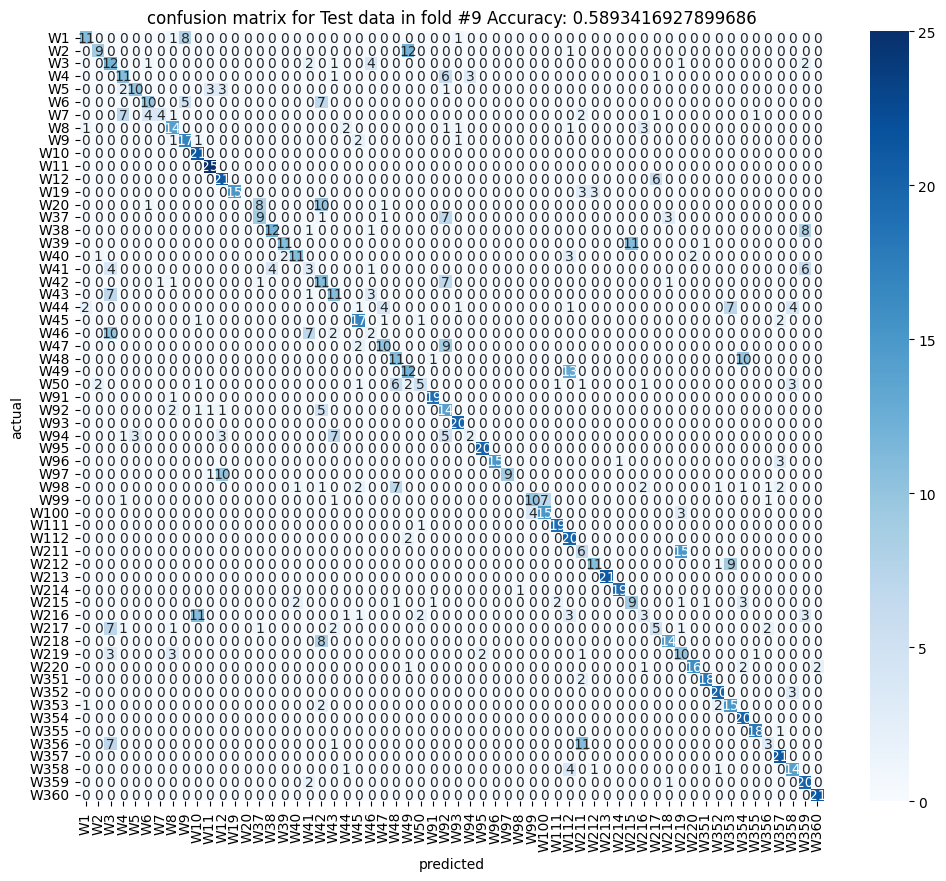

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat= conf_matrixes[bestTest-1]
print('test accuracies: ',test_accuracies, bestTest-1)
print ('validation accuracies: ',all_accuracies)
# average_conf_mat = np.mean(conf_matrixes, axis=0)
# for conf_matrix in conf_matrixes:
#     average_conf_mat +=  conf_matrix
# y_val_true_classes,y_val_pred_classes
ylabel =['W1','W2','W3','W4','W5','W6','W7','W8','W9','W10','W11','W12','W19','W20','W37','W38','W39','W40','W41','W42','W43','W44','W45','W46','W47','W48','W49','W50','W91','W92','W93','W94','W95','W96','W97','W98','W99','W100','W111','W112','W211','W212','W213','W214','W215','W216','W217','W218','W219','W220','W351','W352','W353','W354','W355','W356','W357','W358','W359','W360']
print(len(ylabel))
# ticklabels=np.unique(y_val_true_classes)
plt.figure(figsize=(12,10))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Blues',xticklabels=ylabel,yticklabels=ylabel)
plt.title(f'confusion matrix for Test data in fold #{bestTest} Accuracy: {test_accuracies[bestTest-1]}')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

plt.savefig(f'HandPose_RightHand_LeftHandFlipped_acc_{bestTest-1}_{test_accuracies[bestTest-1]}.png')

In [ ]:
# print(y_val_pred.shape)
# print(y_val_pred)
# print(y_val_pred[0][10])

# bestTest-1

plt.close

<function matplotlib.pyplot.close(fig=None)>

In [ ]:
# y_val_pred = model.predict(x_val)
# print(y_val_pred[0])
# y_val_pred_classes = np.argmax(y_val_pred, axis=1)
# y_val_true_classes = np.argmax(y_val, axis=1)

In [ ]:
print('Hello')

Hello
